In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Check the type of GPU initialized.
!nvidia-smi

Sat Jul  1 14:21:10 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Task: White Blood Cell Classification


The objective of this task is to train a machine learning model to classify different types of white blood cells (WBCs).
The specific types of WBCs to be classified are as follows:
bands,
basophils,
blasts,
eosinophils,
lymphocytes,
metamyelocytes,
monocytes,
myelocytes,
and neutrophils.


# *Data*

I am using Google Colab to train the model, and I have uploaded the provided data to Google Drive.

In [3]:
# mount the drive
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [4]:
# change current working directory
%cd /content/gdrive/MyDrive/WBC_Classfication

/content/gdrive/MyDrive/WBC_Classfication


In [5]:
# list availabel files
!ls

classify-images		      data	     wbc
CNN_model.h5		      README.md      WBC_Classification.ipynb
CNN_performance_accuracy.png  somnath.ipynb
CNN_performance_loss.png      task.zip


In [34]:
# unzip task.zip file
# !unzip '/content/gdrive/MyDrive/WBC_Classfication/task.zip' -d '/content/gdrive/MyDrive/WBC_Classfication/'

 # *Packages*
 import the necessary packages.

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.utils import class_weight

%matplotlib inline

In [7]:
import tensorflow
from keras.layers import Dense, Flatten
from keras.models import Model, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers.attention.multi_head_attention import activation
import keras
from tensorflow.python import image
from tensorflow.keras.utils import img_to_array, load_img
from keras.applications.inception_v3 import InceptionV3, preprocess_input

# *Data and information visualization*

Visualiz the images from each class and documenting the characteristics of each class.

In [37]:
# function to load and show image
def show_img(path):

  """
  Input = complete path of image
  output = display the image

  This function takes the path of an image as input and displays the image.
  """
  img = load_img(path)
  plt.figure(figsize = (4,4))
  plt.imshow(img)
  plt.title(path.split('/')[-2])
  plt.axis = False
  plt.show()

In [38]:
# list of images from each class
paths = ['/content/gdrive/MyDrive/WBC_Classfication/wbc/bands/12_43_347_455_256.jpg',
         '/content/gdrive/MyDrive/WBC_Classfication/wbc/basophils/22_34_428_259_256.jpg',
         '/content/gdrive/MyDrive/WBC_Classfication/wbc/blasts/20_42_355_539_256.jpg',
         '/content/gdrive/MyDrive/WBC_Classfication/wbc/eosinophils/14_22_882_877_256.jpg',
         '/content/gdrive/MyDrive/WBC_Classfication/wbc/lymphocytes/10_56_1767_473_256.jpg',
         '/content/gdrive/MyDrive/WBC_Classfication/wbc/metamyelocytes/13_71_951_247_256.jpg',
         '/content/gdrive/MyDrive/WBC_Classfication/wbc/monocytes/10_94_1281_729_256.jpg',
         '/content/gdrive/MyDrive/WBC_Classfication/wbc/myelocytes/28_42_752_639_256.jpg',
         '/content/gdrive/MyDrive/WBC_Classfication/wbc/neutrophils/10_25_1628_629_256.jpg']


#####Bands
also known as band neutrophils or band cells, are type of immature white blood cell. They have a horseshoe-shaped nucleus, which is not segmented like that of mature neutrophils. Bands are released into the bloodstream in response to an infection or inflammation.

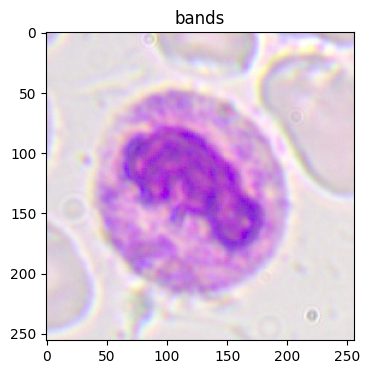

In [39]:
# WBC type - Bands
show_img(paths[0])

##### Basophils
are a type of white blood cell that contains granules filled with histamine and other substances. They are involved in allergic reactions and the body's response to parasitic infections. Basophils are generally less common than other white blood cells.

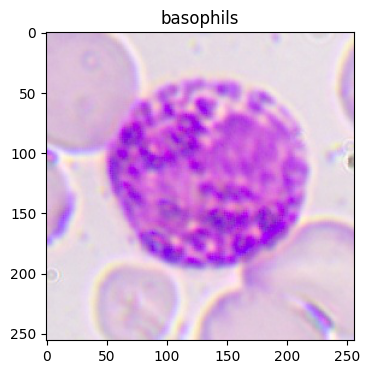

In [40]:
# WBC type - Basophils
show_img(paths[1])

##### Blasts
are immature cells that can be found in the bone marrow. The term "blasts" is often used to describe abnormal or cancerous cells, particularly in the context of leukemia. Leukemia blasts can arise from different cell lineages and impair normal blood cell production.

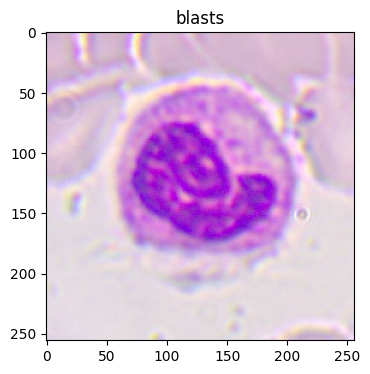

In [41]:
# WBC type - Blasts
show_img(paths[2])

##### Eosinophils
are another type of white blood cell that are characterized by their granules, which stain bright red with acidic dyes. They are primarily involved in combating parasitic infections and modulating allergic responses. Eosinophils are also implicated in certain inflammatory conditions.

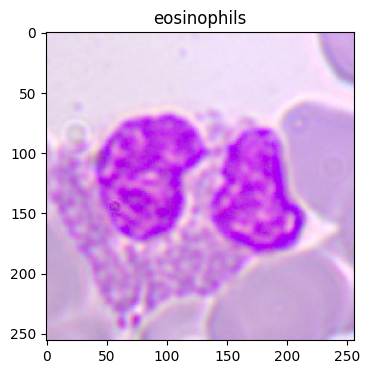

In [42]:
# WBC type - Eosinophils
show_img(paths[3])

#####Lymphocytes
 are a type of white blood cell that plays a key role in the immune response. They are divided into three main subtypes: T cells, B cells, and natural killer (NK) cells. Lymphocytes are responsible for recognizing and attacking specific pathogens or foreign substances.

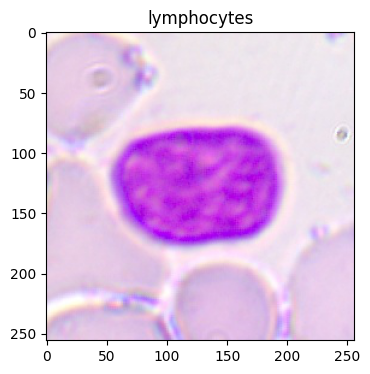

In [43]:
# WBC type - Lymphocytes
show_img(paths[4])

#####Metamyelocytes
are immature white blood cells that are derived from myeloid stem cells. They are characterized by having an irregular-shaped nucleus and specific granules in their cytoplasm. Metamyelocytes eventually mature into segmented neutrophils.

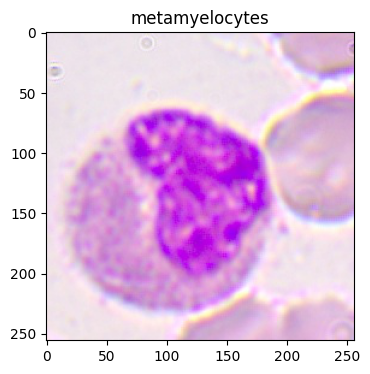

In [44]:
# WBC type - Metamyelocytes
show_img(paths[5])

#####Monocytes
are a type of white blood cell that is involved in the immune response. They are larger cells with a kidney-shaped nucleus. Monocytes can differentiate into macrophages or dendritic cells, which play essential roles in phagocytosis and antigen presentation.

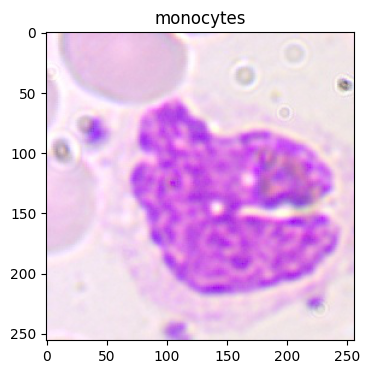

In [45]:
# WBC type - Monocytes
show_img(paths[6])

#####Myelocytes
are immature cells that are part of the myeloid lineage of white blood cells. They arise from myeloblasts and give rise to different types of granulocytes, including neutrophils, eosinophils, and basophils. Myelocytes can be identified by their distinct cell morphology and specific granules.

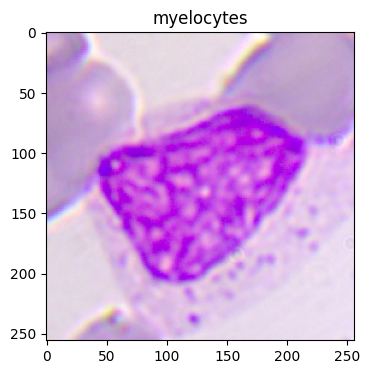

In [46]:
# WBC type - Myelocytes
show_img(paths[7])

#####Neutrophils
are the most abundant type of white blood cell in the bloodstream. They are crucial for fighting bacterial and fungal infections. Mature neutrophils have a segmented nucleus and are often referred to as segmented neutrophils or polymorphonuclear leukocytes (PMNs)

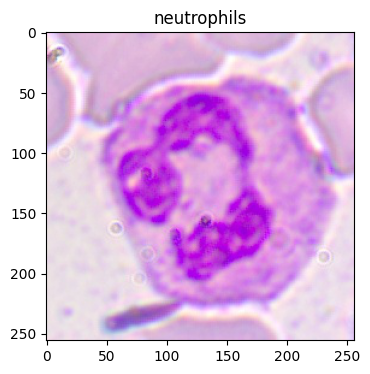

In [47]:
# WBC type - Neutrophils
show_img(paths[8])

# *Train/Validation Split*

Spliting the data into 70% for training and 30% for validation

In [12]:
# The paths for the train and test data
input_folder = '/content/gdrive/MyDrive/WBC_Classfication/wbc'
test = '/content/gdrive/MyDrive/WBC_Classfication/classify-images'


In [13]:
# split folder package for train/valid split
!pip install split-folders


In [48]:
# import splitfolders
import splitfolders

# output path
output_folder = '/content/gdrive/MyDrive/WBC_Classfication/data/'

# split data 70% for traning and 30% validation
splitfolders.ratio(input_folder,
                   output=output_folder,
                   seed=1337,
                   ratio=(.7, .3),
                   group_prefix=None,
                   move=False)

Copying files: 528 files [00:04, 128.04 files/s]


# *Data Preprocessing*

Ploting the Data distribution in train and test folder

In [8]:
#Training and validation folder paths
train_path = '/content/gdrive/MyDrive/WBC_Classfication/data/train'
valid_path = '/content/gdrive/MyDrive/WBC_Classfication/data/val'

In [9]:
# Review the data distribution across the different classes in training
train_data_dict = {}
for dirpath, dirnames, filenames in os.walk(train_path):
    train_data_dict[dirpath.split('/')[-1]] = len(filenames)
del train_data_dict['train']
train_data_dict

{'metamyelocytes': 17,
 'bands': 18,
 'lymphocytes': 133,
 'basophils': 5,
 'eosinophils': 17,
 'myelocytes': 6,
 'neutrophils': 147,
 'monocytes': 21,
 'blasts': 2}

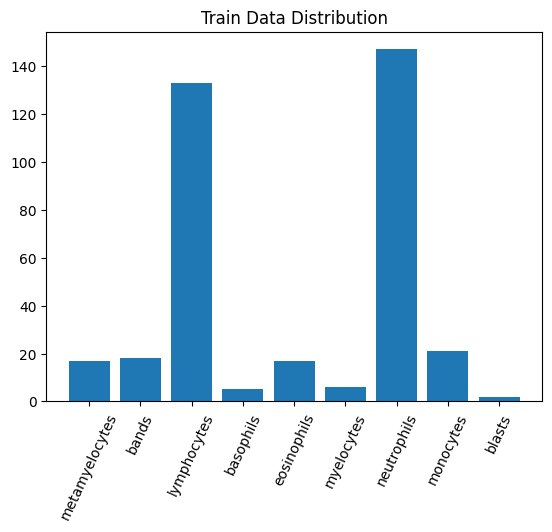

In [14]:
# plot the distribution of classes in training data
plt.bar(train_data_dict.keys(), train_data_dict.values())
plt.xticks(rotation =65)
plt.title("Train Data Distribution");

 From the above plot, it is evident that the data is highly imbalanced, with the number of images in the "neutrophils" and "lymphocytes" classes being more than 20 times higher than the number of images in the "blasts," "myelocytes," and "basophils" classes.

In [32]:
# total samples availabel for training
sum(train_data_dict.values())

421

In [16]:
#  the data distribution across the different classes in validation

valid_data_dict = {}
for dirpath, dirnames, filenames in os.walk(valid_path):
    valid_data_dict[dirpath.split('/')[-1]] = len(filenames)
del valid_data_dict['val']
valid_data_dict

{'metamyelocytes': 8,
 'bands': 9,
 'lymphocytes': 57,
 'basophils': 3,
 'eosinophils': 8,
 'myelocytes': 3,
 'neutrophils': 63,
 'monocytes': 9,
 'blasts': 2}

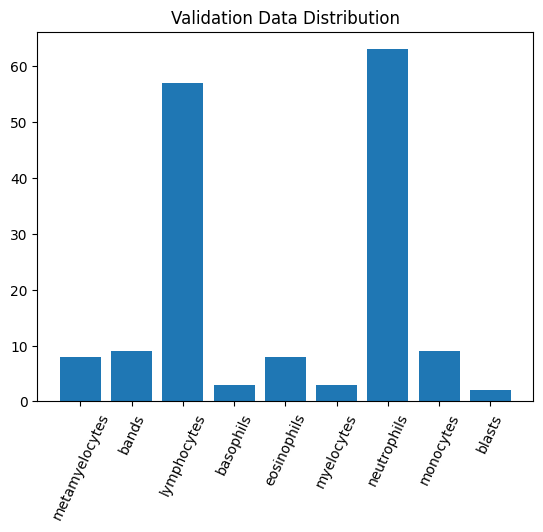

In [17]:
# plot the distribution of classes in validation data
plt.bar(valid_data_dict.keys(), valid_data_dict.values())
plt.xticks(rotation =65)
plt.title("Validation Data Distribution");

In [34]:
sum(valid_data_dict.values())

107

# On-the-Fly Data Augmentation

On the fly data Augmentation using ImageDataGenerator

In [23]:
# ImageDataGenerator to rescale images and generate them dynamically by applying rotations, flips, and zooms.
train_datagen = ImageDataGenerator(rescale=1 / 255.0,
                                   horizontal_flip=True,
                                   shear_range = 0.20,
                                   brightness_range=[0.5,1.0],
                                   vertical_flip=True,
                                   zoom_range=0.20,
                                   rotation_range = 90
                                   )

# ImageDataGenerator for rescale the validation images
valid_datagen = ImageDataGenerator(rescale=1./255.0
                                   )

In [24]:
# Create training and validation datasets - target shape of [224,224,3]
train_data = train_datagen.flow_from_directory(directory= train_path,
                                                target_size = (224,224),
                                                batch_size=32,
                                                class_mode='categorical')

valid_data = valid_datagen.flow_from_directory(directory= valid_path,
                                                target_size = (224,224),
                                                class_mode='categorical',
                                                shuffle= False
                                                )

Found 366 images belonging to 9 classes.
Found 162 images belonging to 9 classes.


In [25]:
# get classes name list
class_names = list(train_data.class_indices)
class_names

['bands',
 'basophils',
 'blasts',
 'eosinophils',
 'lymphocytes',
 'metamyelocytes',
 'monocytes',
 'myelocytes',
 'neutrophils']

# *Convolutional Neural Network Model*

initialize the architecture of a CNN model, define callbacks and compile the model

In [62]:
# CNN model for classifying white blood cells (WBC)
# Create a Sequential model
# Add convolutional/ BatchNormalization/ MaxPool/ Flatten/ Dense/ Dropout layers:
model = keras.models.Sequential([
    keras.layers.Input(shape=[224,224,3]),
    keras.layers.Conv2D(64,3,activation = 'relu'),
    keras.layers.MaxPool2D(3),
    keras.layers.Conv2D(128,3,activation = 'relu'),
    keras.layers.MaxPool2D(3),
    keras.layers.Conv2D(64,3,activation = 'relu'),
    keras.layers.MaxPool2D(3),
    keras.layers.Conv2D(256,3,activation = 'relu'),
    keras.layers.MaxPool2D(3),
    keras.layers.Flatten(),
    keras.layers.Dense(128),
    keras.layers.Dropout(0.20),
    keras.layers.Dense(9, activation ='softmax'),
])


# Compile the model
model.compile('adam',
              loss='categorical_crossentropy',
              metrics = keras.metrics.CategoricalAccuracy(name="categorical_accuracy"))

# Model summary and Trainable/Non-trainable params
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 24, 24, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 22, 22, 64)        73792     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 64)        

In [35]:
# Model checkpoint - Monitor accuracy and save best model
model_checks= ModelCheckpoint(filepath = '/content/gdrive/MyDrive/WBC_Classfication/CNN_model.h5',
                              save_best_only=True,
                              monitor="val_categorical_accuracy",
                              mode="max",
                              verbose=1)

# Early Stopping -Reduce learning rate when a metric has stopped improving for 5 subsequent epocs
reduceLr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                             factor=0.2,
                             patience=10,
                             min_lr=0.0001)

callback = [model_checks, reduceLr]

In [36]:
# train the CNN model
CNN_model = model.fit(train_data,
                      validation_data = valid_data,
                      callbacks= callback,
                      epochs= 150)

Epoch 1/150
12/12 [==============================] - ETA: 0s - loss: 0.2717 - categorical_accuracy: 0.9208
Epoch 1: val_categorical_accuracy improved from -inf to 0.70370, saving model to /content/gdrive/MyDrive/WBC_Classfication/CNN_model.h5
12/12 [==============================] - 8s 660ms/step - loss: 0.2717 - categorical_accuracy: 0.9208 - val_loss: 1.9901 - val_categorical_accuracy: 0.7037 - lr: 1.0000e-04
Epoch 2/150
12/12 [==============================] - ETA: 0s - loss: 0.1291 - categorical_accuracy: 0.9563
Epoch 2: val_categorical_accuracy improved from 0.70370 to 0.72840, saving model to /content/gdrive/MyDrive/WBC_Classfication/CNN_model.h5
12/12 [==============================] - 7s 598ms/step - loss: 0.1291 - categorical_accuracy: 0.9563 - val_loss: 1.7837 - val_categorical_accuracy: 0.7284 - lr: 1.0000e-04
Epoch 3/150
12/12 [==============================] - ETA: 0s - loss: 0.1442 - categorical_accuracy: 0.9536
Epoch 3: val_categorical_accuracy improved from 0.72840 to 0

# *CNN - Model Performance*

Check the performance of CNN_model using Confusion Matrix, Precison, Recall and F1 Score

In [37]:
# Check the performace per epoch
h = CNN_model.history
h.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])

In [38]:
# plot the performance metrics

plt.figure(figsize=(10,4))
plt.plot(h['categorical_accuracy'],'ro--', )

plt.plot(h['val_categorical_accuracy'],'go--')
plt.title("Train Vs Valid Accuracy")
plt.legend(['train', 'val'], loc='upper left')

# save the plot of Accuracy
plt.savefig('/content/gdrive/MyDrive/WBC_Classfication/CNN_performance_accuracy.png', dpi = 96)
plt.close();

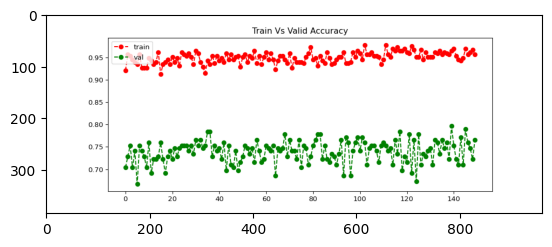

In [39]:
# Load and show the Accuracy
img = mpimg.imread('/content/gdrive/MyDrive/WBC_Classfication/CNN_performance_accuracy.png')
plt.imshow(img);


The training accuracy vs validation accuracy plot for the CNN model reveals that both metrics increase consistently and at a similar pace. This indicates that the model is not overfitting and is performing well on unseen data, achieving a validation accuracy of 81%.

In [40]:
# plot the performance metrics

plt.figure(figsize=(10,4))
plt.plot(h['loss'],'ro--', )

plt.plot(h['val_loss'],'go--')
plt.title("Train Vs Valid Loss")
plt.legend(['train', 'val'], loc='upper left')

# save the plot of Loss
plt.savefig('/content/gdrive/MyDrive/WBC_Classfication/CNN_performance_loss.png', dpi = 96)
plt.close();

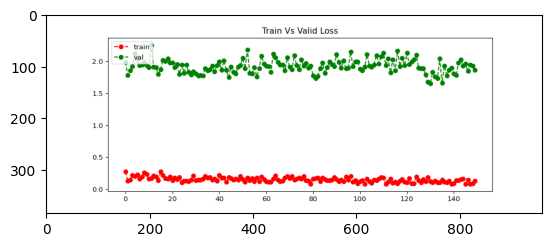

In [41]:
# Load and show the Loss
img = mpimg.imread('/content/gdrive/MyDrive/WBC_Classfication/CNN_performance_loss.png')
plt.imshow(img);


The training loss and validation loss for the CNN model exhibit similar decreasing trends, indicating that the model has learned effectively from the training data. The final loss value of 1.8984 suggests that the model has achieved a relatively low level of error and generalizes well to unseen data.

In [42]:
# define a function to calculate ConfusionMatrix and classification_report for multiclass classification

def get_preformance_metric(model, X_test, y_test):
  """
  Input : model, X_test data and y_test labels

  This function will be responsible for calculating confusion_matrix and classification_report for
  multiclass classification problem from given trained model, X_test data and y_test true labels of data

  """
  model = model

  # get prediction from model
  y_pred = model.predict(X_test)
  y_true = y_test

  # Convert predicted probabilities to class labels
  y_pred_labels = np.argmax(y_pred, axis=1)

  # print classification_report
  print("\nclassification_report:-\n",classification_report(y_true, y_pred_labels))

  # Calculate precision, recall, and accuracy
  print("\nConfusionMatrix:-\n")
  confu_matrix = ConfusionMatrixDisplay.from_predictions(y_true, y_pred_labels)


In [43]:
# load the trained model - CNN_model
best_model = '/content/gdrive/MyDrive/WBC_Classfication/CNN_model.h5'

CNN_model = load_model(best_model)

6/6 [==============================] - 2s 111ms/step

classification_report:-
               precision    recall  f1-score   support

           0       0.33      0.22      0.27         9
           1       0.50      0.33      0.40         3
           2       0.00      0.00      0.00         2
           3       1.00      0.38      0.55         8
           4       0.85      0.98      0.91        57
           5       0.00      0.00      0.00         8
           6       0.60      0.67      0.63         9
           7       0.00      0.00      0.00         3
           8       0.81      0.97      0.88        63

    accuracy                           0.80       162
   macro avg       0.46      0.39      0.40       162
weighted avg       0.73      0.80      0.75       162


ConfusionMatrix:-



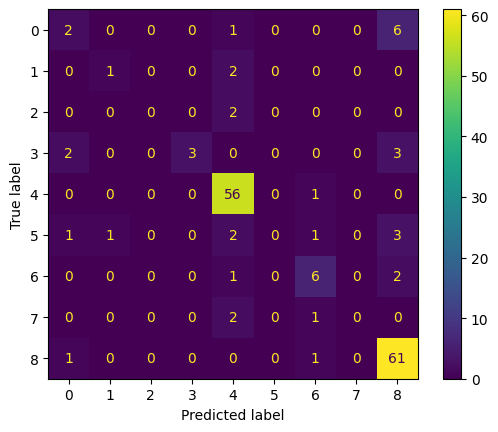

In [44]:
# Validation metrics

# print the  ConfusionMatrix and classification_report
get_preformance_metric(CNN_model, valid_data, valid_data.classes)


The CNN model achieved an accuracy of 80% on the validation data. It demonstrates reasonably high precision and recall values (above 0.5) for most of the classes. However, the model struggles with classes that have a limited number of images, resulting in lower accuracy for those specific classes.

# *InceptionV3 Model*
To address the limitations of CNN models, decided to use Inception-v3 model. Inception-v3 is extensively trained convolutional neural network consists of 48 layers and has been trained on the massive ImageNet dataset, which includes millions of images covering more than 1000 object categories.

Use of Transfer learning - Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem.


In [45]:
# import InceptionV3 model and preprocessing_function
from keras.applications.inception_v3 import InceptionV3, preprocess_input

In [46]:
# download the base InceptionV3 model loaded with weights pre-trained on ImageNet.
base_model = InceptionV3(input_shape=(224,224,3), include_top=False)

In [20]:
# Freeze the layers
for layer in base_model.layers:
  layer.trainable = False

In [47]:
# add Flatten layer to output of base model
x = Flatten()(base_model.output)

# add Dense layer with 9 units as number of classes are 9
x = Dense(units= 9, activation = 'softmax')(x)

#initialise the model
model = Model(base_model.input, x)

# complite the model
model.compile(optimizer= 'adam',
              loss = keras.losses.CategoricalCrossentropy(),
              metrics = keras.metrics.CategoricalAccuracy(name="categorical_accuracy"))

# print the summary of model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_94 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

In [48]:
# Model checkpoint - Monitor accuracy and save best model
model_checks= ModelCheckpoint(filepath = '/content/gdrive/MyDrive/WBC_Classfication/inceptionv3_model.h5',
                              save_best_only=True,
                              monitor="val_categorical_accuracy",
                              mode="max",
                              verbose=1)

# Early Stopping -Reduce learning rate when a metric has stopped improving for 5 subsequent epocs
reduceLr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                             factor=0.2,
                             patience=10,
                             min_lr=0.0001)

callback = [model_checks, reduceLr]

In [49]:
# train the model
inceptionv3_model = model.fit(train_data,
                 epochs = 150,
                 validation_data = valid_data,
                 callbacks = callback)

Epoch 1/150
12/12 [==============================] - ETA: 0s - loss: 4.1149 - categorical_accuracy: 0.4863
Epoch 1: val_categorical_accuracy improved from -inf to 0.38889, saving model to /content/gdrive/MyDrive/WBC_Classfication/inceptionv3_model.h5
12/12 [==============================] - 55s 980ms/step - loss: 4.1149 - categorical_accuracy: 0.4863 - val_loss: 8149.5415 - val_categorical_accuracy: 0.3889 - lr: 0.0010
Epoch 2/150
12/12 [==============================] - ETA: 0s - loss: 2.2550 - categorical_accuracy: 0.4945
Epoch 2: val_categorical_accuracy did not improve from 0.38889
12/12 [==============================] - 8s 659ms/step - loss: 2.2550 - categorical_accuracy: 0.4945 - val_loss: 533888.1875 - val_categorical_accuracy: 0.3889 - lr: 0.0010
Epoch 3/150
12/12 [==============================] - ETA: 0s - loss: 1.7268 - categorical_accuracy: 0.4918
Epoch 3: val_categorical_accuracy did not improve from 0.38889
12/12 [==============================] - 8s 674ms/step - loss: 1

# *InceptionV3 - Model Performance*
Check the InceptionV3_model performance using confusion matrix, precision, recall and f1 score

In [50]:
h = inceptionv3_model.history
h.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy', 'lr'])

In [51]:
# plot the performance metrics

plt.figure(figsize=(10,4))
plt.plot(h['categorical_accuracy'],'ro--', )

plt.plot(h['val_categorical_accuracy'],'go--')
plt.title("Train Vs Valid Accuracy")
plt.legend(['train', 'val'], loc='upper left')

# save the plot of Accuracy
plt.savefig('/content/gdrive/MyDrive/WBC_Classfication/inceptionv3_performance_accuracy.png', dpi = 96)
plt.close();

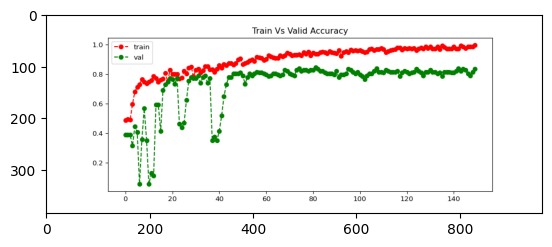

In [52]:
# load and print Loss and Accuracy
img = mpimg.imread('/content/gdrive/MyDrive/WBC_Classfication/inceptionv3_performance_accuracy.png')
plt.imshow(img);


In [53]:
# plot the performance metrics

plt.figure(figsize=(10,4))
plt.plot(h['loss'],'ro--', )

plt.plot(h['val_loss'],'go--')
plt.title("Train Vs Valid Loss")
plt.legend(['train', 'val'], loc='upper left')

# save the plot of Loss
plt.savefig('/content/gdrive/MyDrive/WBC_Classfication/inceptionv3_performance_loss.png', dpi = 96)
plt.close();

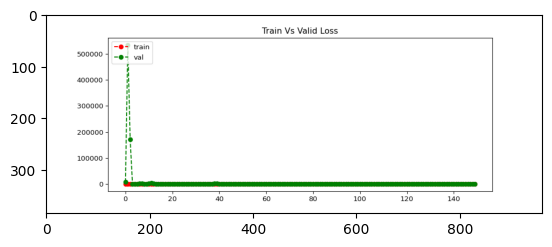

In [54]:
# load and print Loss and Accuracy
img = mpimg.imread('/content/gdrive/MyDrive/WBC_Classfication/inceptionv3_performance_loss.png')
plt.imshow(img);


In [55]:
# load model

best_model = '/content/gdrive/MyDrive/WBC_Classfication/inceptionv3_model.h5'

InceptionV3_model = load_model(best_model)

6/6 [==============================] - 2s 106ms/step

classification_report:-
               precision    recall  f1-score   support

           0       0.25      0.22      0.24         9
           1       1.00      0.67      0.80         3
           2       0.00      0.00      0.00         2
           3       1.00      0.50      0.67         8
           4       0.95      0.98      0.97        57
           5       0.44      0.50      0.47         8
           6       0.62      0.89      0.73         9
           7       0.00      0.00      0.00         3
           8       0.94      0.97      0.95        63

    accuracy                           0.85       162
   macro avg       0.58      0.53      0.54       162
weighted avg       0.84      0.85      0.83       162


ConfusionMatrix:-



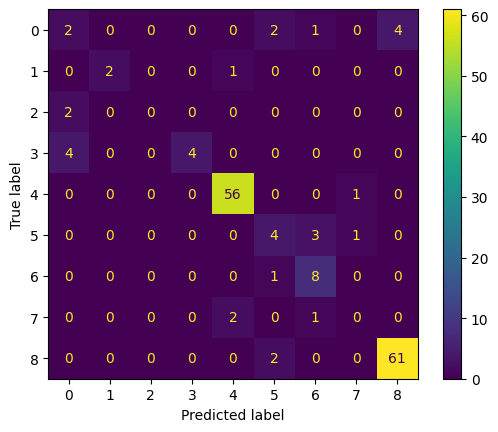

In [56]:
# Validation Metrics

#print ConfusionMatrix and classification_report for InceptionV3_model
get_preformance_metric(InceptionV3_model, valid_data, valid_data.classes)


By employing the Inception-v3 model, we were able to achieve a 85% accuracy on the validation data. However, the imbalanced nature of the dataset persists, with the number of images in the minor classes being extremely low, ranging from less than 5 to only 2. Consequently, calculating precision and recall for these minor classes becomes challenging. It is evident that our model is still struggling to perform effectively for these specific classes

# *Prediction Function*

In [75]:
# prediction function

def predict_img(path, model):
  """
  Input :- Path of image , Model
  Output :- predicted class value

  This function is responsible for predicting the class of image from given path of image and best model
  """
  model = model
  # load image
  img = load_img(path, target_size = (224,224))

  # convert image to array
  i = img_to_array(img)

  input_arr = np.array([i]) * 1./255.0
  # print(input_arr.shape)
  pred = model.predict(input_arr)
  class_ = np.argmax(pred)

  print('The predicted class of images is "{}".'.format(class_names[class_]))

  # to display the image
  plt.imshow(input_arr[0])
  plt.title("Input image:")
  plt.show()

  return class_

In [58]:
# load the best model
best_model = load_model("/content/gdrive/MyDrive/WBC_Classfication/inceptionv3_model.h5")

1/1 [==============================] - 0s 29ms/step
The predicted class of images is "lymphocytes".


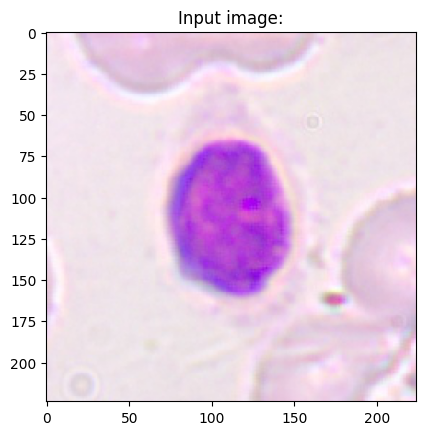

In [61]:
#path of input image
path = '/content/gdrive/MyDrive/WBC_Classfication/data/val/lymphocytes/10_79_1324_896_256.jpg'

#get prediction
p = predict_img(path, best_model)

In [63]:
# list test images
%cd '/content/gdrive/MyDrive/WBC_Classfication/classify-images'
test_images = os.listdir()

/content/gdrive/MyDrive/WBC_Classfication/classify-images


In [ ]:
# predict for test images
test_prediction = {}
for path in test_images:
  p = predict_img(path, best_model)
  test_prediction[path] = p


In [68]:
# get class names
get_class_name = {}
for key, val in list(test_prediction.items()):
  get_class_name[key] = class_names[val]

In [71]:
# make data frame
data = {"Image_name":test_prediction.keys(),
        "y_pred":test_prediction.values(),
        "Class_label":get_class_name.values()}

df = pd.DataFrame(data)
df.head()

,Image_name,y_pred,Class_label
0,54.jpg,8,neutrophils
1,56.jpg,0,bands
2,35.jpg,8,neutrophils
3,58.jpg,8,neutrophils
4,45.jpg,6,monocytes


In [73]:
# save the prediction of test data to csv
df.to_csv("/content/gdrive/MyDrive/WBC_Classfication/test_data_prediction.csv")